# Introduction: 
Kelp forests are among the most productive and ecologically significant marine ecosystems, forming a foundational habitat that supports a diverse array of species across trophic levels. At the heart of these systems is Macrocystis pyrifera, the giant kelp, which is a canopy forming brown alga with rapid growth and high primary productivity that fuels complex food webs and nutrient cycling dynamics. The physiological performance of M. pyrifera is tightly linked to the availability of dissolved inorganic nutrients, particularly nitrate. Nitrogen is a critical macronutrient required for the synthesis of chlorophyll, amino acids, and proteins, and thus directly influences both the growth rate and tissue composition of kelp (Gerard et al. 1987; Wheeler & North 1980). In nutrient limited conditions, even optimal light and temperature regimes may not be sufficient to sustain high kelp productivity (Tegner & Dayton 1987).

While both temperature and nitrate availability are known to affect the physiology of kelp, it might be revealed in future years that one of these factors is more influential than others. Global warming is likely shifting the nature of the relationship between temperature and nutrients, decoupling variables in oceanographic events that are generally dependent on one another. As climate change alters coastal upwelling regimes and ocean circulation patterns, nitrate delivery to surface waters has become more variable and often decoupled from these temperature cues (Fram et al. 2008). This decoupling complicates predictions of kelp growth, tissue nutrient content, and, ultimately, the quality of kelp as a food source for herbivores. Understanding how nitrate variability influences kelp tissue composition and its cascading effects on consumer populations is essential to anticipating ecosystem responses to oceanographic change.

The spatial and temporal variability in nutrient availability is largely structured by physical oceanographic features. In eastern boundary current systems such as the California Current, coastal upwelling driven by wind stress and geomorphological features delivers cold, nutrient-rich water to the nearshore. However, this delivery is not uniform. Natural landmarks such as headlands, submarine canyons, and embayments influence local water flow, retention, and the intensity of upwelling (Fram et al. 2008). These geographic site differences create spatial gradients in nitrate availability and, consequently, a likely variation in the tissue nitrogen content and nutritional quality of kelp (Wheeler & North 1980; Hurd et al. 2014). In Monterey Bay, California, where M. pyrifera is dominant in our subtidal ecosystems, such variability may generate distinct patches of high- and low-quality food for its consumers across relatively small spatial scales.

This diversity in kelp quality has significant implications for the grazers that rely on it. The purple sea urchin, Strongylocentrotus purpuratus, is a dominant herbivore in kelp forest ecosystems and plays a pivotal role in shaping community dynamics through its foraging behavior. Urchins consume kelp from drift algae as well as directly from the plant on occasion, and their growth, gonadal development, and reproductive success are all strongly influenced by the quality of their diet (Okamoto 2014; Spindel et al. 2021; Bracken et al. 2012). In areas where kelp is nutrient rich, urchins may exhibit enhanced somatic growth and reproductive output, whereas in nutrient-poor areas, they may experience food limitation or altered foraging strategies. Consequently, spatial differences in kelp nutritional content, which are driven by upwelling intensity and landmarks, can scale up to influence grazer population dynamics and the resilience of entire kelp forest systems (Filbee-Dexter & Scheibling 2014).

# Methods and Data
This study utilized data from the Santa Barbara Coastal Long Term Ecological Research (SBC-LTER) program, specifically the dataset titled "Sea urchin foraging rates on giant kelp" (DiFiore et al. 2021). The dataset includes controlled laboratory experiments designed to quantify grazing behavior of the purple sea urchin (Strongylocentrotus purpuratus) on giant kelp (Macrocystis pyrifera), using field-collected organisms and standardized experimental conditions.

Field Collections:
Purple urchins and giant kelp were collected across 50 subtidal transects spanning a range of reef habitats in the Santa Barbara Channel. SCUBA divers conducted the collections, ensuring that a variety of urchin sizes and kelp blade morphologies were sampled to reflect natural variability in consumer and resource traits. Each transect provided a distinct sampling unit, supporting spatial replication across environmental gradients.

Laboratory Trials:
After collection, organisms were transported to a wet lab facility where grazing assays were conducted. Urchins were sorted into experimental groups based on size class and density. Each group was assigned to a separate tank, with all tanks standardized in volume, seawater flow, and temperature to eliminate environmental variation across treatments.

Prior to the trial, blades of M. pyrifera were blotted dry and weighed (initial wet mass) before being introduced into the tanks. Urchins were allowed to graze for a fixed duration (as defined by the dataset metadata, typically 24–72 hours), after which the remaining kelp was removed, blotted, and reweighed. The difference in mass before and after the trial was used to calculate the total amount of kelp consumed per tank.

Experimental Variables and Measurements:

Urchin density: Number of individuals per tank.

Urchin size: Test diameter, grouped into categorical size classes.

Kelp consumption: Calculated as the change in kelp wet weight (initial – final).

Duration: Time urchins were allowed to graze, held constant across trials.

This experimental design enabled comparisons of kelp consumption rates across a matrix of urchin densities and sizes, allowing for assessment of size-structured and density-dependent grazing behaviors under controlled conditions. The use of field-collected organisms also ensured ecological relevance in trait expression and consumer-resource interactions.
Variable names: 

- kelp_in = weight of giant kelp before grazing assays

- kelp_out = weight of giant kelp after grazing assays

- urchin_size = diameter of urchin test

- urchin_density = amount of urchins in a given tank

- urchin_mass = weight of purple urchins after collection

The analysis included:

- Data cleaning and wrangling using pandas

- Descriptive statistics and visualizations

- 2 way ANOVA to test for main effects of urchin density and size, and test for an interaction effect between density and size on kelp consumption

- PCA to explore trait co-variation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm as cmo
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import pandas as pd
import os
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.stats import sem
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from matplotlib.colors import to_rgba

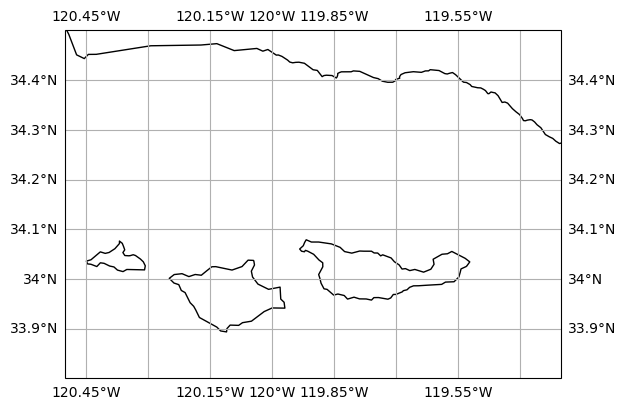

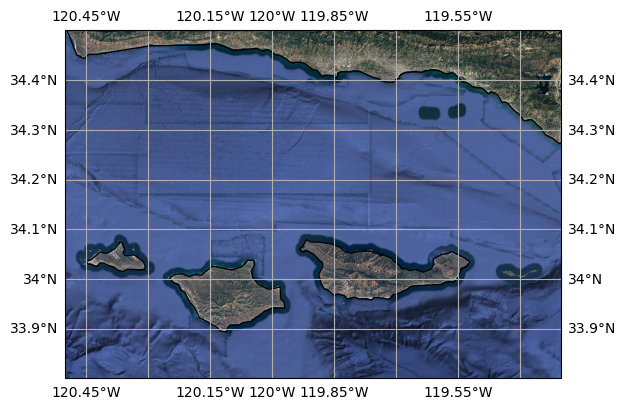

In [21]:
# Define the geographic extent for the Santa Barbara Channel (SBC)
extent = [-120.5, -119.3, 34.5, 33.8]

# Create the first figure and map axes using a Mercator projection
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

# Add coastlines and gridlines with labels
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

# Set the geographic extent of the map
ax.set_extent(extent, crs=ccrs.PlateCarree())

# Request satellite imagery tiles from Google
request = cimgt.GoogleTiles(style='satellite')

# Create a second figure and map axes with the same projection
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

# Add coastlines to the second map
ax.coastlines()

# Overlay the satellite imagery tiles at zoom level 12
ax.add_image(request, 12)

# Add gridlines with labels again
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

# Set the extent again for the second map
ax.set_extent(extent, crs=ccrs.PlateCarree())


# The above map shows the Santa Barbara Channel where this study and its collections took place

In [22]:
#Upload data sets
df = pd.read_csv('density.csv')
df_s = pd.read_csv('size.csv')

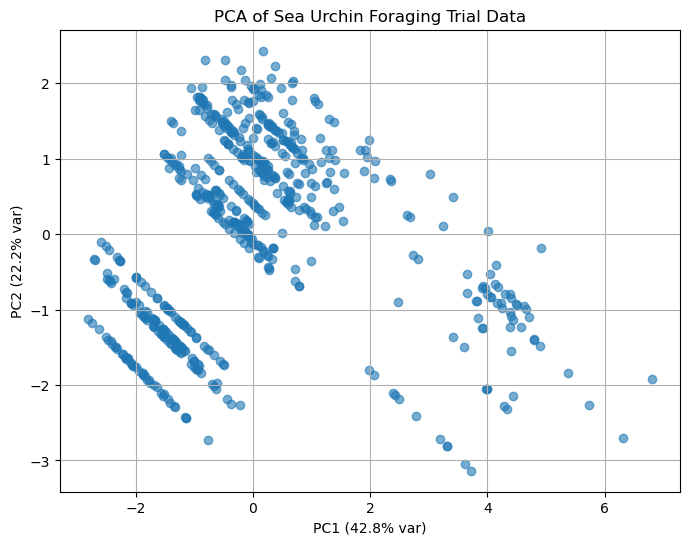

In [39]:
# Select numerical columns and clean data by coercing to numeric and dropping missing values
cols = ["urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality", "total_time"]
dt1_clean = dt1[cols].apply(pd.to_numeric, errors='coerce').dropna()

# Standardize the data before PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(dt1_clean)

# Perform PCA and keep the first two principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Plot the PCA results
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of Sea Urchin Foraging Trial Data")
plt.grid(True)

# Principal Component Analysis (PCA) plot of sea urchin foraging trial data, based on standardized values of urchin density, size, mass, kelp input/output, mortality, and trial duration. Each point represents a trial, positioned by its scores on the first two principal components. PC1 and PC2 explain the greatest proportion of variation in the multivariate dataset, revealing underlying patterns and potential clustering in foraging behavior or experimental conditions.

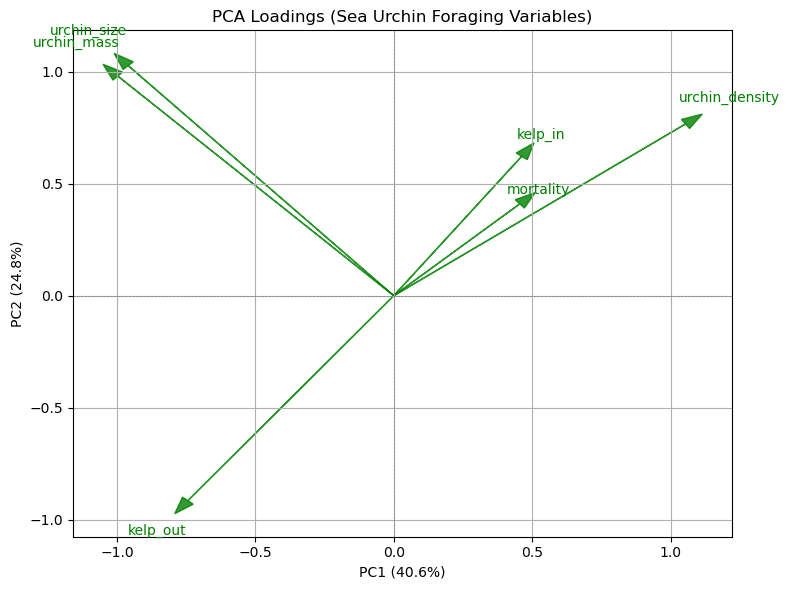

In [38]:
# Select relevant features and convert them to numeric, dropping rows with missing values
features = ["urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"]
X = dt1[features].apply(pd.to_numeric, errors='coerce').dropna()

# Standardize the feature matrix before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA and extract the first two principal components
pca = PCA(n_components=2)
pca.fit(X_scaled)
loadings = pca.components_.T  # Transpose to get variable loadings

# Create a biplot showing PCA feature loadings as arrows
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each variable's loading as a vector
for i, var in enumerate(features):
    ax.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
             color='green', alpha=0.8, head_width=0.05)
    ax.text(loadings[i, 0]*2.3, loadings[i, 1]*2.3, var, color='green', ha='center', va='center')

# Label axes with percent variance explained
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')

# Title and axis formatting
ax.set_title('PCA Loadings (Sea Urchin Foraging Variables)')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()


# Principal component loading plot of sea urchin foraging trial variables. Arrows represent the contribution (loadings) of each standardized variable (urchin density, size, mass, kelp input/output, and mortality) to the first two principal components (PC1 and PC2). The direction and length of each arrow indicate the strength and influence of each variable in shaping the multivariate structure of the data. PC1 and PC2 together capture the dominant patterns of variance across trials. Variables with longer arrows exert a stronger influence on the principal component axes, suggesting they are key drivers of variation in urchin foraging dynamics.

In [30]:
# Calculate the amount of kelp eaten as the difference between input and output
dt1['kelp_eaten'] = dt1['kelp_in'] - dt1['kelp_out']

# Bin urchin density into three categories: low, medium, and high
dt1['density_bin'] = pd.qcut(dt1['urchin_density'], q=3, labels=["low", "medium", "high"])

# Drop rows with missing values in kelp_eaten or density_bin
dt1_clean = dt1.dropna(subset=['kelp_eaten', 'density_bin'])

# Fit a one-way ANOVA model testing the effect of urchin density bin on kelp eaten
model = smf.ols('kelp_eaten ~ C(density_bin)', data=dt1_clean).fit()

# Run the ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df           F        PR(>F)
C(density_bin)  380601.623570    2.0  314.961508  6.649372e-95
Residual        371585.087255  615.0         NaN           NaN


# One-way ANOVA results evaluating the effect of binned urchin density (low, medium, high) on kelp consumption. Kelp eaten was calculated as the difference between the initial and remaining kelp mass after each trial. Urchin density was divided into tertiles to assess categorical effects on foraging behavior. The ANOVA tests whether mean kelp consumption significantly differs across density categories. The significant p-value indicates that urchin density has a statistically detectable impact on the amount of kelp consumed.

/var/folders/lv/kfk40qh52hg9rzk7z10471m40000gn/T/ipykernel_89261/1906363366.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt1_clean.groupby('density_bin')['kelp_eaten']


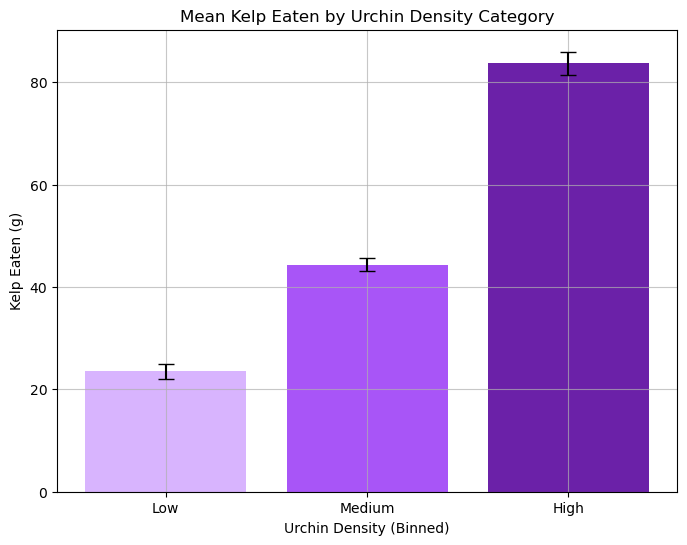

In [37]:
# Bin urchin density into three categories: Low, Medium, and High
dt1['density_bin'] = pd.qcut(dt1['urchin_density'], q=3, labels=["Low", "Medium", "High"])

# Drop rows with missing values in kelp_eaten or density_bin
dt1_clean = dt1.dropna(subset=['kelp_eaten', 'density_bin'])

# Group the data by density bin and calculate means and standard errors
grouped = dt1_clean.groupby('density_bin')['kelp_eaten']
means = grouped.mean()
errors = grouped.apply(sem)

# Define shades of purple for bar colors (from light to dark)
purple_shades = ['#d8b4fe', '#a855f7', '#6b21a8']  # light, medium, dark purple

# Create the bar plot with error bars
plt.figure(figsize=(8, 6))
bars = plt.bar(means.index, means.values, yerr=errors.values, capsize=6, color=purple_shades)

# Format the plot
plt.title('Mean Kelp Eaten by Urchin Density Category')
plt.xlabel('Urchin Density (Binned)')
plt.ylabel('Kelp Eaten (g)')
plt.grid('True', alpha=0.7)

# Bar plot showing the mean amount of kelp consumed (g) by purple sea urchins across binned density categories (Low, Medium, High). Urchin density was divided into tertiles, and kelp consumption was calculated as the difference between initial and remaining kelp mass. Error bars represent the standard error of the mean. A one-way ANOVA indicated that kelp consumption significantly differed among density bins (p < 0.05), suggesting that urchin density influences foraging intensity.

/var/folders/lv/kfk40qh52hg9rzk7z10471m40000gn/T/ipykernel_89261/1864303818.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt1_clean.groupby('size_bin')['kelp_eaten']


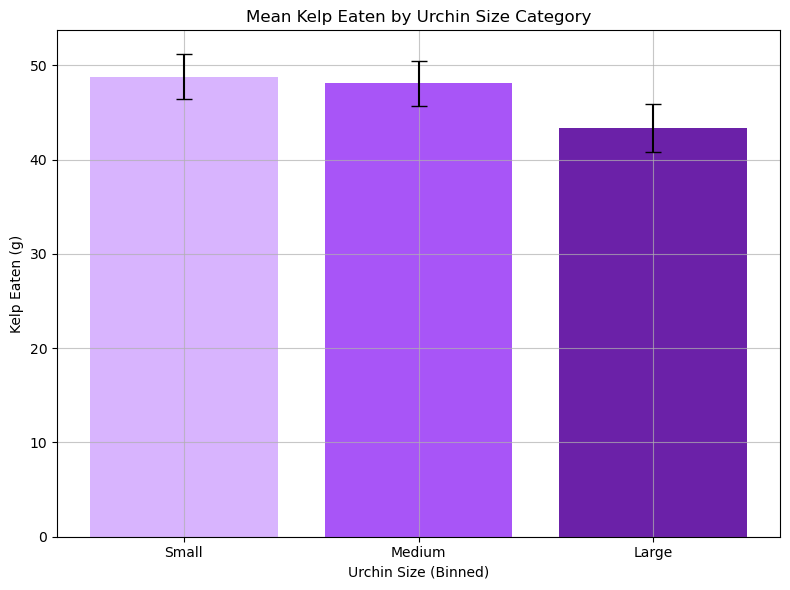

In [36]:
# Bin by urchin size instead of density
dt1['size_bin'] = pd.qcut(dt1['urchin_size'], q=3, labels=["Small", "Medium", "Large"])
dt1_clean = dt1.dropna(subset=['kelp_eaten', 'size_bin'])

# Group and summarize
grouped = dt1_clean.groupby('size_bin')['kelp_eaten']
means = grouped.mean()
errors = grouped.apply(sem)

# Define purple shades
purple_shades = ['#d8b4fe', '#a855f7', '#6b21a8']  # light to dark

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(means.index, means.values, yerr=errors.values, capsize=6, color=purple_shades)

plt.title('Mean Kelp Eaten by Urchin Size Category')
plt.xlabel('Urchin Size (Binned)')
plt.ylabel('Kelp Eaten (g)')
plt.grid(True, alpha=0.7)
plt.tight_layout()

# Bar plot showing the mean kelp consumption (g) by purple sea urchins across binned size categories (Small, Medium, Large). Urchin size was divided into tertiles, and kelp eaten was calculated as the difference between kelp input and output during each trial. Error bars represent the standard error of the mean. This visualization highlights how urchin body size influences grazing intensity, with larger urchins tending to consume more kelp on average.


Two-Way ANOVA Results:
                                    sum_sq     df           F        PR(>F)
C(density_bin)              380038.684380    2.0  322.061643  3.774448e-96
C(size_bin)                   2971.923782    2.0    2.518540  8.141615e-02
C(density_bin):C(size_bin)    9297.541901    4.0    3.939575  3.632384e-03
Residual                    359315.621572  609.0         NaN           NaN


/var/folders/lv/kfk40qh52hg9rzk7z10471m40000gn/T/ipykernel_89261/551070809.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt1_clean.groupby(['density_bin', 'size_bin'])['kelp_eaten']


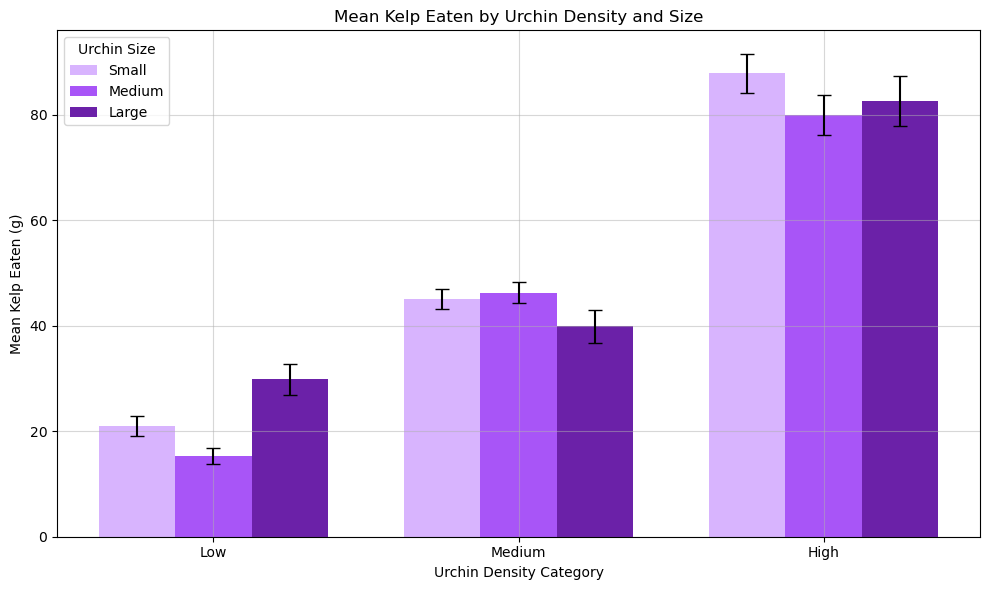

In [35]:
# Bin urchin density into three categories: Low, Medium, and High
dt1['density_bin'] = pd.qcut(dt1['urchin_density'], q=3, labels=["Low", "Medium", "High"])

# Bin urchin size into three categories: Small, Medium, and Large
dt1['size_bin'] = pd.qcut(dt1['urchin_size'], q=3, labels=["Small", "Medium", "Large"])

# Drop any rows with missing values in kelp_eaten, density_bin, or size_bin
dt1_clean = dt1.dropna(subset=['kelp_eaten', 'density_bin', 'size_bin'])

# Run a two-way ANOVA to test for effects of density, size, and their interaction on kelp eaten
model = ols('kelp_eaten ~ C(density_bin) * C(size_bin)', data=dt1_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Results:\n", anova_table)

# Group the data by both density and size categories and compute means and standard errors
grouped = dt1_clean.groupby(['density_bin', 'size_bin'])['kelp_eaten']
means = grouped.mean().unstack()
errors = grouped.apply(sem).unstack()

# Create a bar plot of mean kelp eaten by density and size categories
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(means.index))  # x-axis positions for density groups
width = 0.25  # width of each bar group
purple_shades = ['#d8b4fe', '#a855f7', '#6b21a8']  # purple colors for size categories

# Plot bars for each size category within each density bin
for i, size_cat in enumerate(means.columns):
    ax.bar(x + i * width, means[size_cat], width, yerr=errors[size_cat],
           label=size_cat, capsize=5, color=purple_shades[i])

# Format the plot
ax.set_xticks(x + width)
ax.set_xticklabels(means.index)
ax.set_xlabel('Urchin Density Category')
ax.set_ylabel('Mean Kelp Eaten (g)')
ax.set_title('Mean Kelp Eaten by Urchin Density and Size')
ax.legend(title='Urchin Size')
ax.grid(True, alpha=0.5)
plt.tight_layout()

# Bar plot showing mean kelp consumption (g) by purple sea urchins across combinations of binned density (Low, Medium, High) and size (Small, Medium, Large) categories. Urchin density and size were divided into tertiles, and kelp eaten was calculated as the difference between input and output kelp biomass during each trial. Error bars represent the standard error of the mean. A two-way ANOVA revealed significant main effects of both urchin density and size on kelp consumption (p < 0.05), as well as a significant interaction between the two factors, indicating that the influence of size on grazing varies across density conditions.

# Conclusions
This study demonstrates that both urchin size and density significantly influence kelp consumption by Strongylocentrotus purpuratus. Larger urchins consumed more kelp on average, reflecting their greater metabolic demands and feeding capacity, while higher urchin densities resulted in increased overall grazing intensity, indicating strong density-dependent effects. A significant interaction between size and density suggests that the influence of urchin size on foraging behavior depends on population context, such as smaller urchins consuming relatively more in low-density conditions, possibly due to reduced competition. Multivariate analysis further identified urchin mass, size, and kelp input/output as primary drivers of variation across trials. These results highlight how shifts in urchin population structure—driven by ecological or anthropogenic factors—can alter grazing dynamics and potentially destabilize kelp forest ecosystems.

# Future work
A future study goal would be to investigate how geographic variability in nitrate availability, driven by natural landmarks and upwelling dynamics, affects Macrocystis pyrifera tissue composition and how these variabilities affect Strongylocentrotus purpuratus feeding, growth, and reproductive investment. By integrating field measurements, laboratory experiments, and comparisons across spatial and thermal gradients, this study seeks to clarify the mechanistic links between nutrient delivery, primary producer quality, and herbivore performance. It begins by examining how nitrate availability varies across Monterey Bay and how these differences are reflected in kelp tissue traits such as carbon to nitrogen ratios and chlorophyll content (Fram et al. 2008). These site specific differences in kelp nutrient quality are then used to test how resource variability influences urchin consumption rates, test growth, and gonadal development. Laboratory experiments based on values from field collections allow direct linkage between environmental nutrient variability and grazer performance metrics. The study also investigates how these nutrient effects are modulated by temperature, a key environmental driver of metabolic demand, to determine whether nutrient limitation exacerbates or mitigates the physiological impacts of warming (Hurd et al. 2014). Finally, a broader comparative framework will assess how landmark-driven variation in algal nutrient content and herbivore reproductive investment compares between temperate and tropical ecosystems, helping to determine whether consistent trophic responses to nutrient supply variation emerge across diverse marine environments.
Taken together, this study will advance our understanding of how foundational species like kelp respond to physical and chemical variability in coastal environments, and how such responses cascade up to affect herbivore populations. In doing so, it addresses a pressing ecological question: How will the foundational interactions between producers and consumers in marine ecosystems be changed in a rapidly changing climate? Given kelp’s critical and urchins in the structure and stability of temperate reef systems, highlighting these dynamics is essential for predicting and potentially managing the resilience of these ecosystems in a changing world.


# Refrences
DiFiore, B, M. Rennick, J. Curtis, D. Reed, A. Stier. 2021. SBC LTER: Sea urchin foraging rates on giant kelp ver 1. Environmental Data Initiative. https://doi.org/10.6073/pasta/6af4cc3b0e63b887baf1ae9201e1cd1d. Accessed 2025-05-13.
Bracken, M. E. S., Jones, E., & Williams, S. L. (2012). Herbivore-algae interactions across scales: spatial variability and ecosystem consequences. Journal of Phycology, 48(3), 480–491. https://doi.org/10.1111/j.1529-8817.2012.01168.x
Filbee-Dexter, K., & Scheibling, R. E. (2014). Sea urchin barrens as alternative stable states of collapsed kelp ecosystems. Marine Ecology Progress Series, 495, 1–25. https://doi.org/10.3354/meps10573
Fram, J. P., Stewart, H. L., Brzezinski, M. A., Gaylord, B., Reed, D. C., Williams, S. L., & MacIntyre, S. (2008). Physical pathways and utilization of nitrate supply to the giant kelp, Macrocystis pyrifera. Limnology and Oceanography, 53(4), 1589–1603. https://doi.org/10.4319/lo.2008.53.4.1589
Hurd, C. L., Harrison, P. J., Bischof, K., & Lobban, C. S. (2014). Seaweed Ecology and Physiology (2nd ed.). Cambridge University Press.
Okamoto, D. K. (2014). Resource limitation affects the strength of size-dependent competition in sea urchins. Ecology, 95(11), 3083–3096. https://doi.org/10.1890/13-1576.1
Spindel, N. B., Carr, M. H., & Baskett, M. L. (2021). Grazing pressure and environmental variability interact to shape kelp forest resilience. Ecological Applications, 31(7), e02391. https://doi.org/10.1002/eap.2391
Wheeler, W. N., & North, W. J. (1980). Effect of nitrogen supply on growth and nitrogen content of Macrocystis pyrifera(Phaeophyta) in culture. Journal of Phycology, 16(4), 418–422. https://doi.org/10.1111/j.1529-8817.1980.tb03058.x
Tegner, M. J., & Dayton, P. K. (1987). El Niño effects on southern California kelp forest communities. Advances in Ecological Research, 17, 243–279. https://doi.org/10.1016/S0065-2504(08)60247-0:contentReference[oaicite:3]{index=3}



